In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Loading Dataset

In [484]:
def load_data():
    """
    Returns:
    X - training data with dimensions (n_of_features, n_of_examples)
    Y - labels (1 on the class index, -1 elsewhere) with dimensions (n_of_features, n_of_examples)
    """
    x1 = []
    x2 = []
    classes = []
    with open('tren_data2_06.txt') as f:
        for line in f:
            line = line.split()
            
            x1.append(float(line[0]))
            x2.append(float(line[1]))
            classes.append(int(float(line[2])))
    
    X = np.array([[x1, x2] for x1, x2 in zip(x1, x2)])
    
    classes = np.array(classes)
    """
    Y = np.zeros(shape=(classes.shape[0], classes.max()))
    Y[np.arange(classes.shape[0]), classes-1] = 1
    """
    Y = np.ones(shape=(classes.shape[0], classes.max()))
    Y[np.arange(classes.shape[0]), classes-1] = -1
    Y = -Y

    return X.T, Y.T, classes

In [485]:
X, Y, classes = load_data()

print(X[:,0])
print(Y[:,0])
# print(classes)

[ 7.6919123 -6.8810342]
[ 1. -1. -1. -1. -1.]


In [440]:
def plotPoints(X, classes):
    plt.figure(figsize=(10, 7))
    X = np.array(X)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=classes)
    plt.title("Zobrazení dat", fontsize=18)
    ax = plt.gca()
    ax.set_facecolor('white')
    plt.savefig('obr/data1.png') # NUTNO ZMENIT PRO DANA DATA
    plt.show()

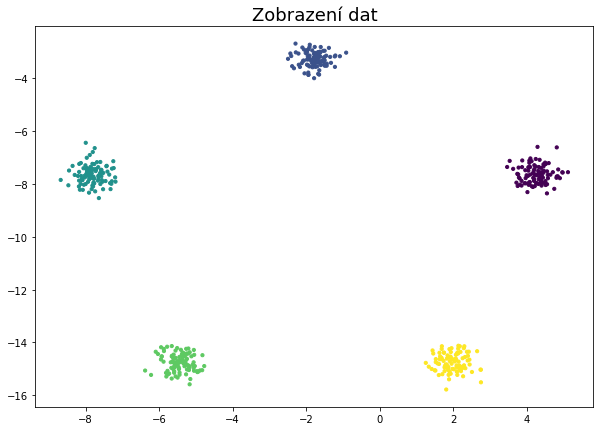

In [441]:
plotPoints(X.T, classes)

## Building blocks

### Initialization

In [443]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y,1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [444]:
# parametry site
parameters = initialize_parameters(2, 5, 5)
#print("W1 = " + str(parameters["W1"]))
#print("b1 = " + str(parameters["b1"]))
#print("W2 = " + str(parameters["W2"]))
#print("b2 = " + str(parameters["b2"]))

print("W1.shape = " + str(parameters["W1"].shape))
print("b1.shape = " + str(parameters["b1"].shape))
print("W2.shape = " + str(parameters["W2"].shape))
print("b2.shape = " + str(parameters["b2"].shape))

W1.shape = (5, 2)
b1.shape = (5, 1)
W2.shape = (5, 5)
b2.shape = (5, 1)


### Forward Propagation

In [445]:
def tanh(x, slope):
    # POZN. - numpy ma vlastni tanh
    t = 2 / (1+np.exp(-slope*x)) - 1
    return t

In [446]:
def forward_propagation(X, parameters, slope):
    """
    Argument:
    X - input data of size (n_x, m)
    parameters - python dictionary containing parameters
    slopes - list of slope values
    
    Returns:
    A2 - The output of neural network
    cache - dictionary containing "Z1", "A1", "Z2", "A2"
    """
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = tanh(Z1, slope[0])
    Z2 = np.dot(W2, A1) + b2
    A2 = tanh(Z2, slope[1])
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [447]:
slope = [1, 1]
A2, cache = forward_propagation(X, parameters, slope)

In [448]:
print(A2.shape)
print(A2[:,0])

(5, 500)
[ 1.66050083e-04 -4.39080125e-05 -1.41872734e-04  5.83206734e-04
 -4.55040021e-05]


### Compute Cost

In [449]:
def compute_cost(A, Y):
    """
    Argument:
    A - output of neural network
    Y - correct label
    
    Returns:
    E - error across all training examples
    """
    
    cost_vec = np.zeros((Y.shape[1],1))
    
    for i in range(Y.shape[1]):
        cost_vec[i,0] = np.dot((Y-A)[:,i], (Y-A)[:,i].T)
    
    #print(cost_vec.shape)
    summed_cost = np.sum(cost_vec, axis=0)
    #print(summed_cost)
    
    E = 1/2 * summed_cost[0]
    
    return E

In [450]:
E = compute_cost(A2, Y)
print(E)

1249.8579532722617


### Backward propagation

In [451]:
def backward_propagation(X, Y, parameters, cache, slope):
    m = X.shape[1]
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]
    
    dZ2 = (Y - A2) * (slope[1]/2) * (1 - np.power(A2,2))
    dW2 = (1/m) * np.dot(dZ2,A1.T)
    db2 = (1/m) * (np.sum(dZ2,axis=1,keepdims=True))
    
    dZ1 = np.dot(W2.T,dZ2) * (slope[0]/2) * (1 - np.power(A1,2)) # no ale nenasobim to tim np.sum((Y - A2),axis=0)
    dW1 = (1/m) * np.dot(dZ1,X.T)
    db1 = (1/m) *(np.sum(dZ1, axis=1, keepdims=True))
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2,}
    
    return grads

In [452]:
print(parameters["W2"])
grads = backward_propagation(X, Y, parameters, cache, slope)
print(grads["dW2"])

[[ 3.32174930e-04  2.09415323e-02  1.52356298e-02 -1.39543286e-03
  -4.28473202e-03]
 [ 9.62662060e-05  1.32331806e-02  1.45539196e-02 -7.98729461e-03
   9.05212660e-03]
 [-3.02519521e-03 -6.30161324e-03 -3.78701167e-03  9.18951734e-03
  -1.03974339e-02]
 [ 2.92918931e-03  2.35140271e-03 -3.40825902e-03 -1.53816750e-02
   3.52463420e-03]
 [-1.76331036e-03  2.31410137e-02 -2.27614746e-03  5.20441539e-03
   1.43648383e-02]]
[[-0.02506796 -0.01024571  0.03090771  0.01071975  0.01287737]
 [-0.02717761 -0.01553614  0.03401018  0.02167605  0.01931355]
 [-0.01846593 -0.01395564  0.023487    0.0224464   0.01723028]
 [-0.0109953  -0.00764174  0.01393685  0.01185623  0.00945328]
 [-0.01501937 -0.00536117  0.01844175  0.00467253  0.00678044]]


### Update parameters

In [453]:
def update_parameters(parameters, grads, learning_rate):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 + learning_rate * dW1
    b1 = b1 + learning_rate * db1
    W2 = W2 + learning_rate * dW2
    b2 = b2 + learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [463]:
learning_rate = 0.1
slope = [1, 1]
print(parameters["W2"])

A2, cache = forward_propagation(X, parameters, slope)
print("\n" + "Output of neural network: \n" + str(A2[:,0]) + "\n")

parameters = update_parameters(parameters, grads, learning_rate)
print(parameters["W2"])

[[-7.18821313e-03  1.78678180e-02  2.45079428e-02  1.82049293e-03
  -4.21521143e-04]
 [-8.05701776e-03  8.57233963e-03  2.47569744e-02 -1.48447942e-03
   1.48461914e-02]
 [-8.56497378e-03 -1.04883058e-02  3.25908911e-03  1.59234377e-02
  -5.22834840e-03]
 [-3.69399486e-04  5.88797716e-05  7.72797174e-04 -1.18248065e-02
   6.36061695e-03]
 [-6.26912237e-03  2.15326627e-02  3.25637827e-03  6.60617550e-03
   1.63989709e-02]]

Output of neural network: 
[-0.04640739 -0.04659436 -0.04539234 -0.04492056 -0.04608915]

[[-0.00969501  0.01684325  0.02759871  0.00289247  0.00086622]
 [-0.01077478  0.00701873  0.02815799  0.00068313  0.01677755]
 [-0.01041157 -0.01188387  0.00560779  0.01816808 -0.00350532]
 [-0.00146893 -0.00070529  0.00216648 -0.01063918  0.00730594]
 [-0.00777106  0.02099655  0.00510055  0.00707343  0.01707702]]


In [464]:
A2, cache = forward_propagation(X, parameters, slope)

In [465]:
print("Output of neural network after update: \n" + str(A2[:,0]))

Output of neural network after update: 
[-0.06193377 -0.06209202 -0.06043629 -0.06005577 -0.06142962]


## Model

In [539]:
def nn_model(X, Y, slope, learning_rate, num_iterations, print_cost):
    
    cost_list = []
    lowest_accept_error = 30
    
    n_x = X.shape[0]
    n_h = 10
    n_y = Y.shape[0]
    
    print("The size of the input layer is: n_x = " + str(n_x))
    print("The size of the hidden layer is: n_h = " + str(n_h))
    print("The size of the output layer is: n_y = " + str(n_y) + "\n")
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    print("First initial weight matrix \n" + str(W1) + "\n")
    print("First initial bias vector \n" + str(b1) + "\n")
    print("Second initial weight matrix \n" + str(W2) + "\n")
    print("Second initial bias vector \n" + str(b2) + "\n")
    
    trained = False
    
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters, slope)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(X, Y, parameters, cache, slope)
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if i % 50 == 0: # NUTNO ZMENIT PRO DANA DATA
           cost_list.append(cost)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
        if cost <= lowest_accept_error:
            cost_list.append(cost)
            
            print("\n" + "Neural network has been trained after %i iterations \n" %i)
            print("Final error is %f \n" %cost)
            trained = True
            break;
            
    if (not trained):
        print("\n" + "Neural network didnt reach desired error value %i" %lowest_accept_error)
        print("Final achieved error is %f \n" %cost)
            
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
            
    print("First final weight matrix \n" + str(W1) + "\n")
    print("First final bias vector \n" + str(b1) + "\n")
    print("Second final weight matrix \n" + str(W2) + "\n")
    print("Second final bias vector \n" + str(b2) + "\n")
    
    return parameters, cost_list

In [540]:
slope = [1, 1] # sklon u tanh funkce

parameters, cost_list = nn_model(X, Y, slope, learning_rate=1, num_iterations=1000, print_cost=True)

#   DATA1
#learning rate = 1
#lowest_accept_error = 1
#num_iterations = 1000, ale skonci to tak po 700,800
#pro vykreslovani - i % 20 nebo 50

#   DATA2
#learning rate = 1
#lowest_accept_error = 25 (ale stacilo by i 30)
#num_iterations = 1000, ale skonci to tak po 700,800
#pro vykreslovani - i % 50

The size of the input layer is: n_x = 2
The size of the hidden layer is: n_h = 10
The size of the output layer is: n_y = 5

First initial weight matrix 
[[ 0.01026643  0.0088836 ]
 [-0.00078867 -0.00917819]
 [ 0.01115675 -0.00666682]
 [ 0.00486351  0.02675077]
 [-0.0053082  -0.00471453]
 [-0.00472148  0.00622596]
 [-0.00640173 -0.01103243]
 [-0.02059213  0.01434056]
 [ 0.00512347  0.00028852]
 [-0.00284391 -0.00701028]]

First initial bias vector 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

Second initial weight matrix 
[[-0.00022643  0.01175444 -0.00021877 -0.00691238 -0.00453118  0.00744696
   0.02010544 -0.00505749 -0.0095176  -0.00213335]
 [-0.00261614 -0.00612276 -0.00781063  0.01133409 -0.0041035   0.01246322
  -0.00398552  0.0044108  -0.00696477  0.00956079]
 [ 0.00486458 -0.00712559 -0.00688421  0.00134266  0.00634157 -0.00059088
   0.00880974 -0.00400229  0.00137438 -0.00845649]
 [ 0.00265986  0.00537668 -0.00421722  0.00451911  0.0138177   0.01585083
   0.00

In [541]:
A2, cache = forward_propagation(X, parameters, slope)
A2 = np.rint(A2) # round to nearest integer

print(A2[:,0])
print(Y[:,0])

[ 1. -1. -1. -1. -1.]
[ 1. -1. -1. -1. -1.]


## Zavislost chyby na trenovacich cyklech

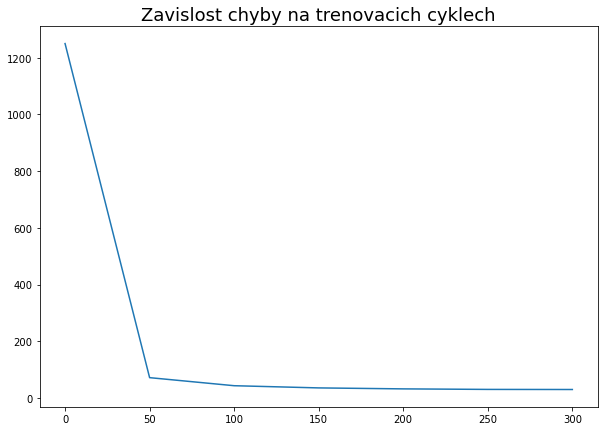

In [542]:
i = range(len(cost_list))
i = [item * 50 for item in i] # CISLO MUSI SEDET S TIM, CO JE V MODELU

# neberu kazdy error, jinak to osciluje hodne, graf je dost necitelny, neni dobre videt trend

plt.figure(figsize=(10, 7))
plt.plot(i, cost_list)
plt.title("Zavislost chyby na trenovacich cyklech", fontsize=18)
ax = plt.gca()
ax.set_facecolor('white')

plt.savefig('obr/nn_2layer_error_data2') # NUTNO ZMENIT PRO DANA DATA
plt.show()

## Klasifikace rastru

In [543]:
def createraster(X, pointsinrow):
    boundary = [np.amax(X[1, :]) + 0.2, np.amax(X[0, :]) + 0.2, np.amin(X[1, :]) - 0.2, np.amin(X[0, :]) - 0.2]  # clockwise
    
    print(np.amax(X[1, :]))
    print(np.amax(X[0, :]))
    print(np.amin(X[1, :]))
    print(np.amin(X[0, :]))
    
    top, right, bottom, left = boundary
    columnpoints = top - bottom
    raster = np.linspace([left, top], [right, top], pointsinrow)
    top -= columnpoints / pointsinrow

    while top >= bottom:
        raster_row = np.linspace([left, top], [right, top], pointsinrow)
        raster = np.concatenate((raster, raster_row), axis=0)
        top -= columnpoints / pointsinrow

    plt.show()

    return raster

In [544]:
pointsinrow = 200  # points in 1 row
raster = createraster(X, pointsinrow)

12.409329
13.435873
-14.29898
-11.071743


In [545]:
raster_classified, cache = forward_propagation(raster.T, parameters, slope)
raster_classified = np.rint(raster_classified)
print(raster_classified[:, 247:250])

[[-1. -1. -1.]
 [-1. -1. -1.]
 [-1. -1. -1.]
 [ 1.  1.  1.]
 [-1. -1. -1.]]


In [546]:
raster_classes = []
points_with_class = []
points_without_class = []
j = 0

for i in range(raster_classified.shape[1]):
    
    column = raster_classified[:,i]
    column_sum = np.sum(column)
    
    if column_sum == -3:
        x = np.squeeze(np.where(column == 1))
        
        if x.size > 0:
            raster_classes.append(x)
            points_with_class.append(raster[i])
        
        """ DEBUG
        j +=1
        if j==247:
            print(raster_classified[:,i])
            print(np.squeeze(np.where(column == 1)))
            print(raster_classes[-1])
        """
        

In [547]:
print(raster_classes[247:250])

[array(2), array(2), array(2)]


## Vykresleni oklasifikovaneho rastru

In [548]:
def plotPoints2(X, classes, Y, classes2):
    X = np.array(X)
    Y = np.array(Y)
    classes = np.array(classes)
    classes2 = np.array(classes2)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(Y[:, 0], Y[:, 1], s=10, c=classes2)
    plt.scatter(X[:, 0], X[:, 1], s=10, c='salmon') # classes nebo pr 'salmon'
    plt.title("Klasifikace bodů vstupního prostoru", fontsize=18)
    ax = plt.gca()
    ax.set_facecolor('white')
    plt.savefig('obr/nn_2layer_data2')
    plt.show()

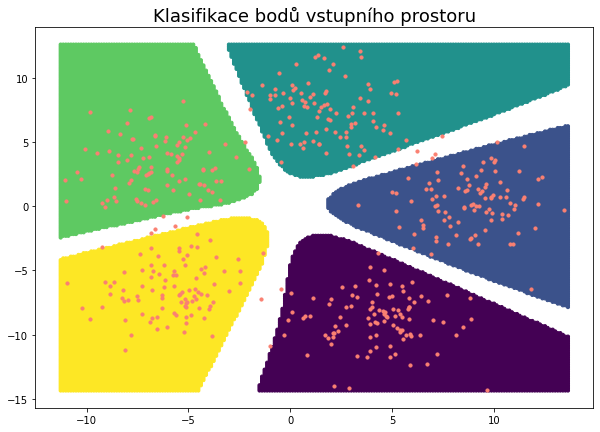

In [549]:
#plotPoints(points_with_class, raster_classes)
#plotPoints(X.T, classes)
plotPoints2(X.T, classes, points_with_class, raster_classes)